In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from numpy import sqrt

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
    
FIGURE_PATH='figures/'

from scipy.optimize import curve_fit

In [2]:
def cm2inch(lst):
    inch = 2.54
    if isinstance(lst, list):
        return [x/inch for x in lst] 
    elif isinstance(lst, float):
        return lst/inch

default_width =  cm2inch(21/sqrt(2)) # 5.78853 # approx 14.7cm
default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean
print(default_width)

5.846158427132873


In [3]:
default_width = cm2inch(21/sqrt(2))
default_ratio = default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean

In [4]:
from matplotlib import rcParams
from matplotlib import cycler
if mpl.get_backend() == 'pgf':
    rcParams.update({'legend.loc' : 'best'})
    rcParams.update({
        "text.usetex": True,
        "pgf.texsystem": "xelatex",
        "pgf.rcfonts": False,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "figure.figsize": [default_width, default_width * default_ratio],
        "pgf.preamble": [
            r"\usepackage[utf8x]{inputenc}",
            r"\usepackage[T1]{fontenc}",
        ],
        "figure.constrained_layout.use": True,
    })
    rcParams.update({'savefig.bbox' : 'standard'})
    rcParams.update({'savefig.pad_inches' : 0.0})
else:
    rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : [15,9.47]})
    rcParams.update({'font.size' : 16})
rcParams.update({'errorbar.capsize' : 4})
rcParams.update({'legend.loc' : 'best'})
rcParams.update({'axes.prop_cycle': cycler('color', ["#cf115d", "#786eb3", "#bce333", "#99c1b8", "#0cc0aa", "#8547d9", "#76f014", "#ea85f5"])})
rcParams.update({'lines.markeredgecolor': 'black',
                 'lines.markerfacecolor': 'black'})

# Absorption von $\beta$-Strahlung

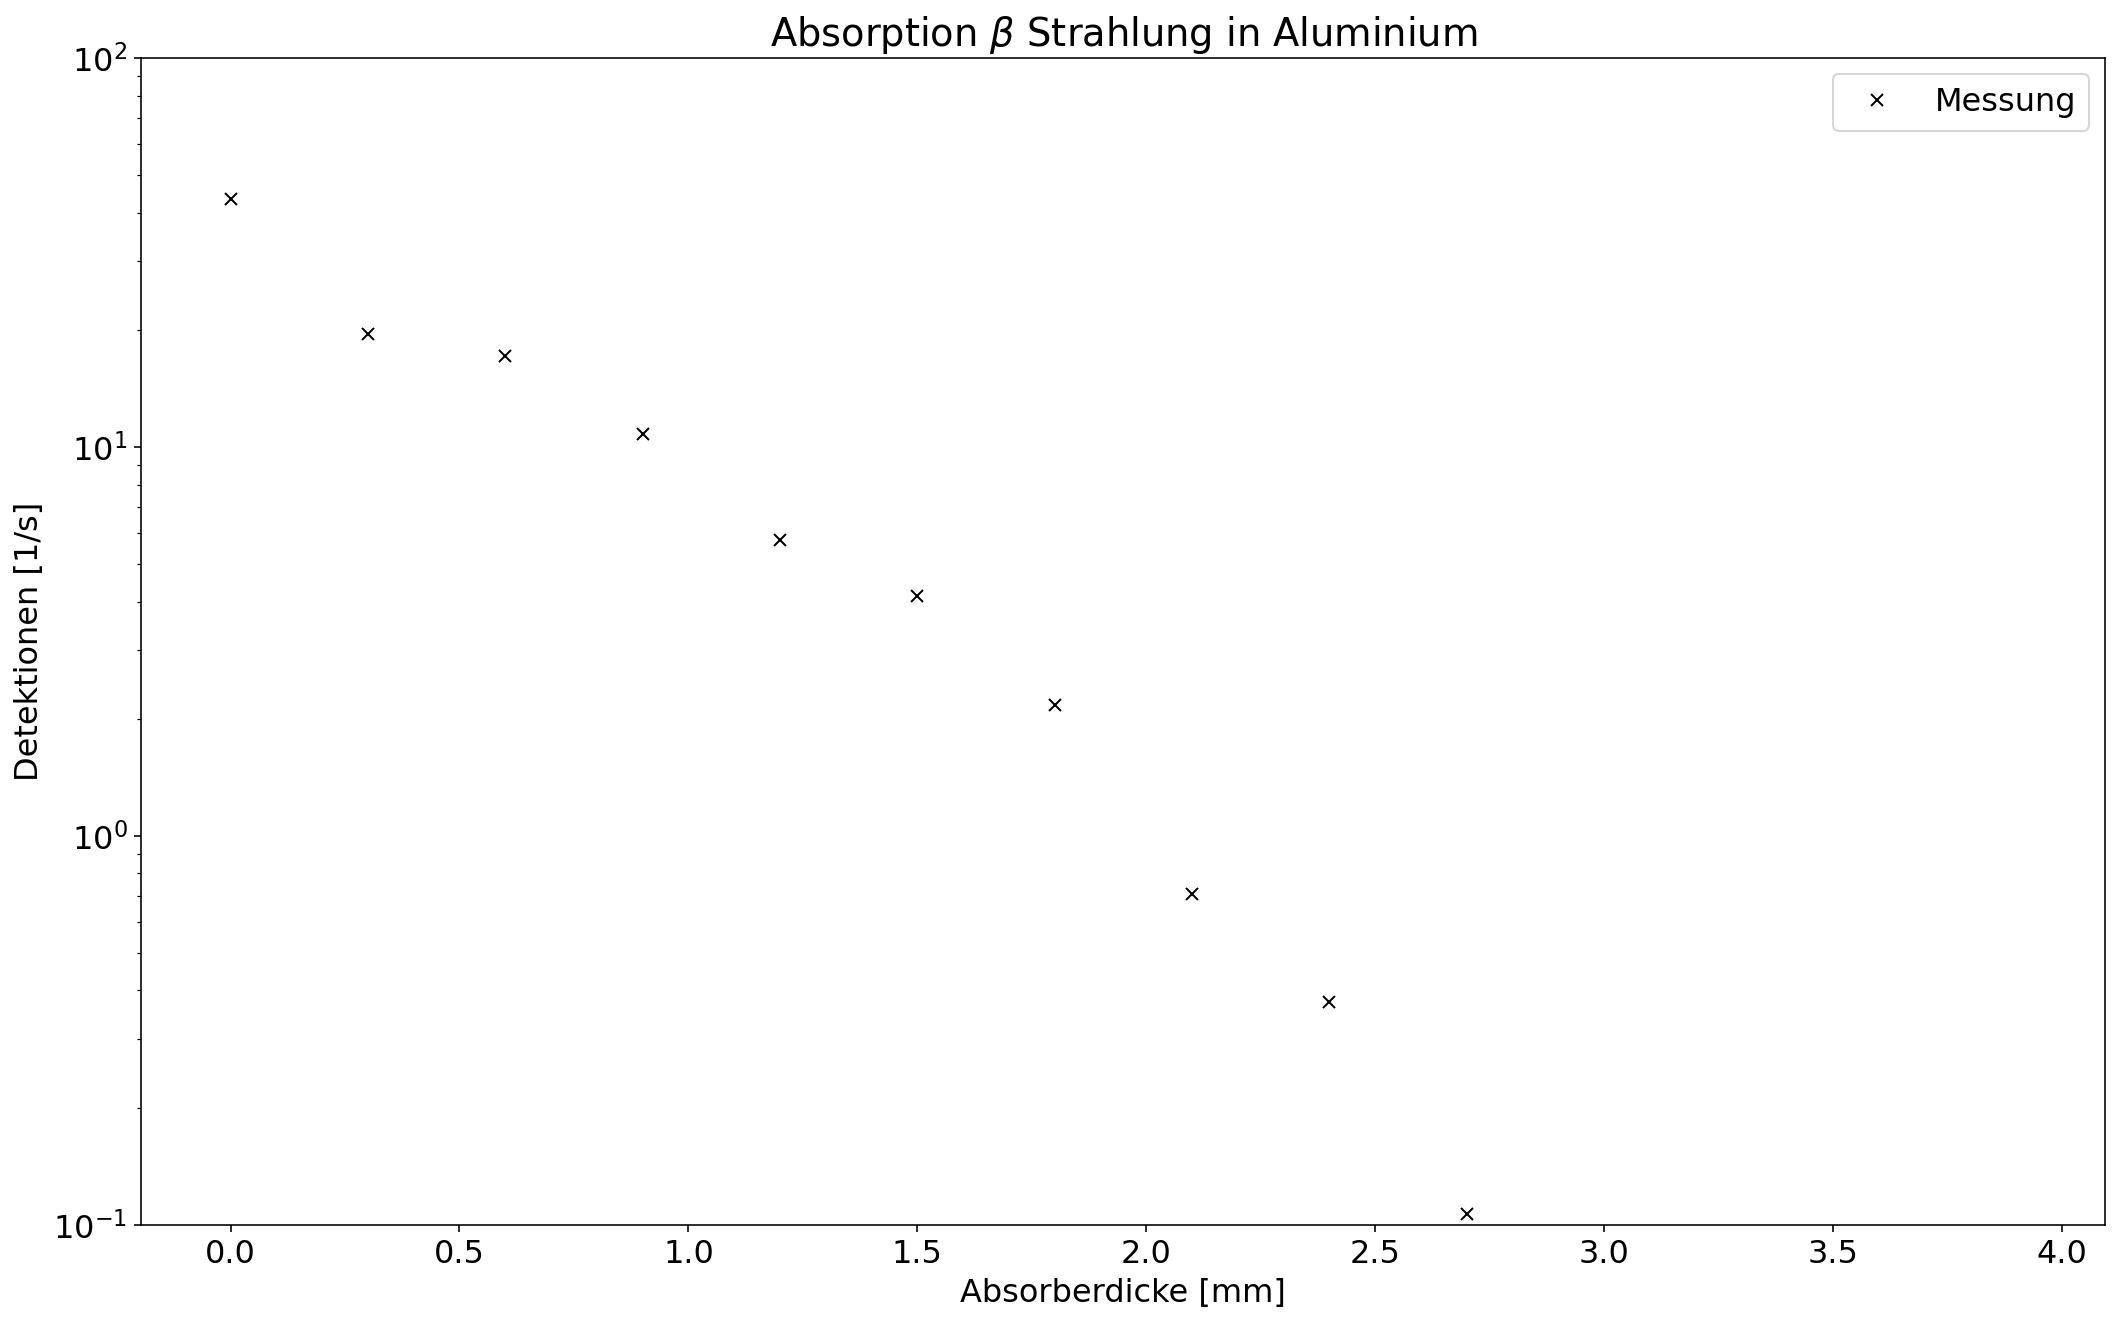

In [5]:
N = np.array([1320, 607, 537, 346, 195, 146, 87, 43, 132, 100, 62, 57, 47, 45]) # Detektionen 

t = np.array([30, 30, 30, 30, 30, 30, 30, 30, 120, 120, 120, 120, 120, 120]) # Messzeit

d = np.arange(0, 4, 0.3) # Aluminium Dicke

N_0b = 218
t0 = 300
n_0b = N_0b / t0 # Nullmessung beta

n = N / t - n_0b  # korrigierte Detektionen 

n_err = sqrt(N/t**2 + N_0b/t0**2) # Fehler korrigierte Detektionen 

plt.plot(d, n, linestyle='None', marker='x', color='black', label='Messung')
plt.yscale('log')
plt.ylim(0.1, 100)
plt.title(r'Absorption $\beta$ Strahlung in Aluminium')
plt.xlabel('Absorberdicke [mm]')
plt.ylabel('Detektionen [1/s]')
plt.legend()
plt.show()

In [6]:
def fit_func(x, a, b, c):
    return np.exp(a*x + b) + c

p0=[-1.5, 3.7, -0.5]
popt, pcov = curve_fit(fit_func, d, n, sigma=n_err, p0=p0, absolute_sigma=True)

In [7]:
a, b, c = popt
a_err, b_err, c_err = np.sqrt(pcov.diagonal())

print(f'a = {a} +/- {a_err}')
print(f'b = {b} +/- {b_err}')
print(f'c = {c} +/- {c_err}')

a = -1.5531033427988472 +/- 0.03663252823200529
b = 3.691446229095371 +/- 0.02320292511677892
c = -0.5055517291444638 +/- 0.04938474138792201


In [8]:
d_max = (np.log(-c) - b) / a
d_max_err = np.sqrt((d_max * a_err / a)**2 + (b_err/a)**2 + (c_err/(c*a)**2)) 

print(f'd_max = {d_max} +/- {d_max_err}')

d_max = 2.8160078094616905 +/- 0.29110148234503014


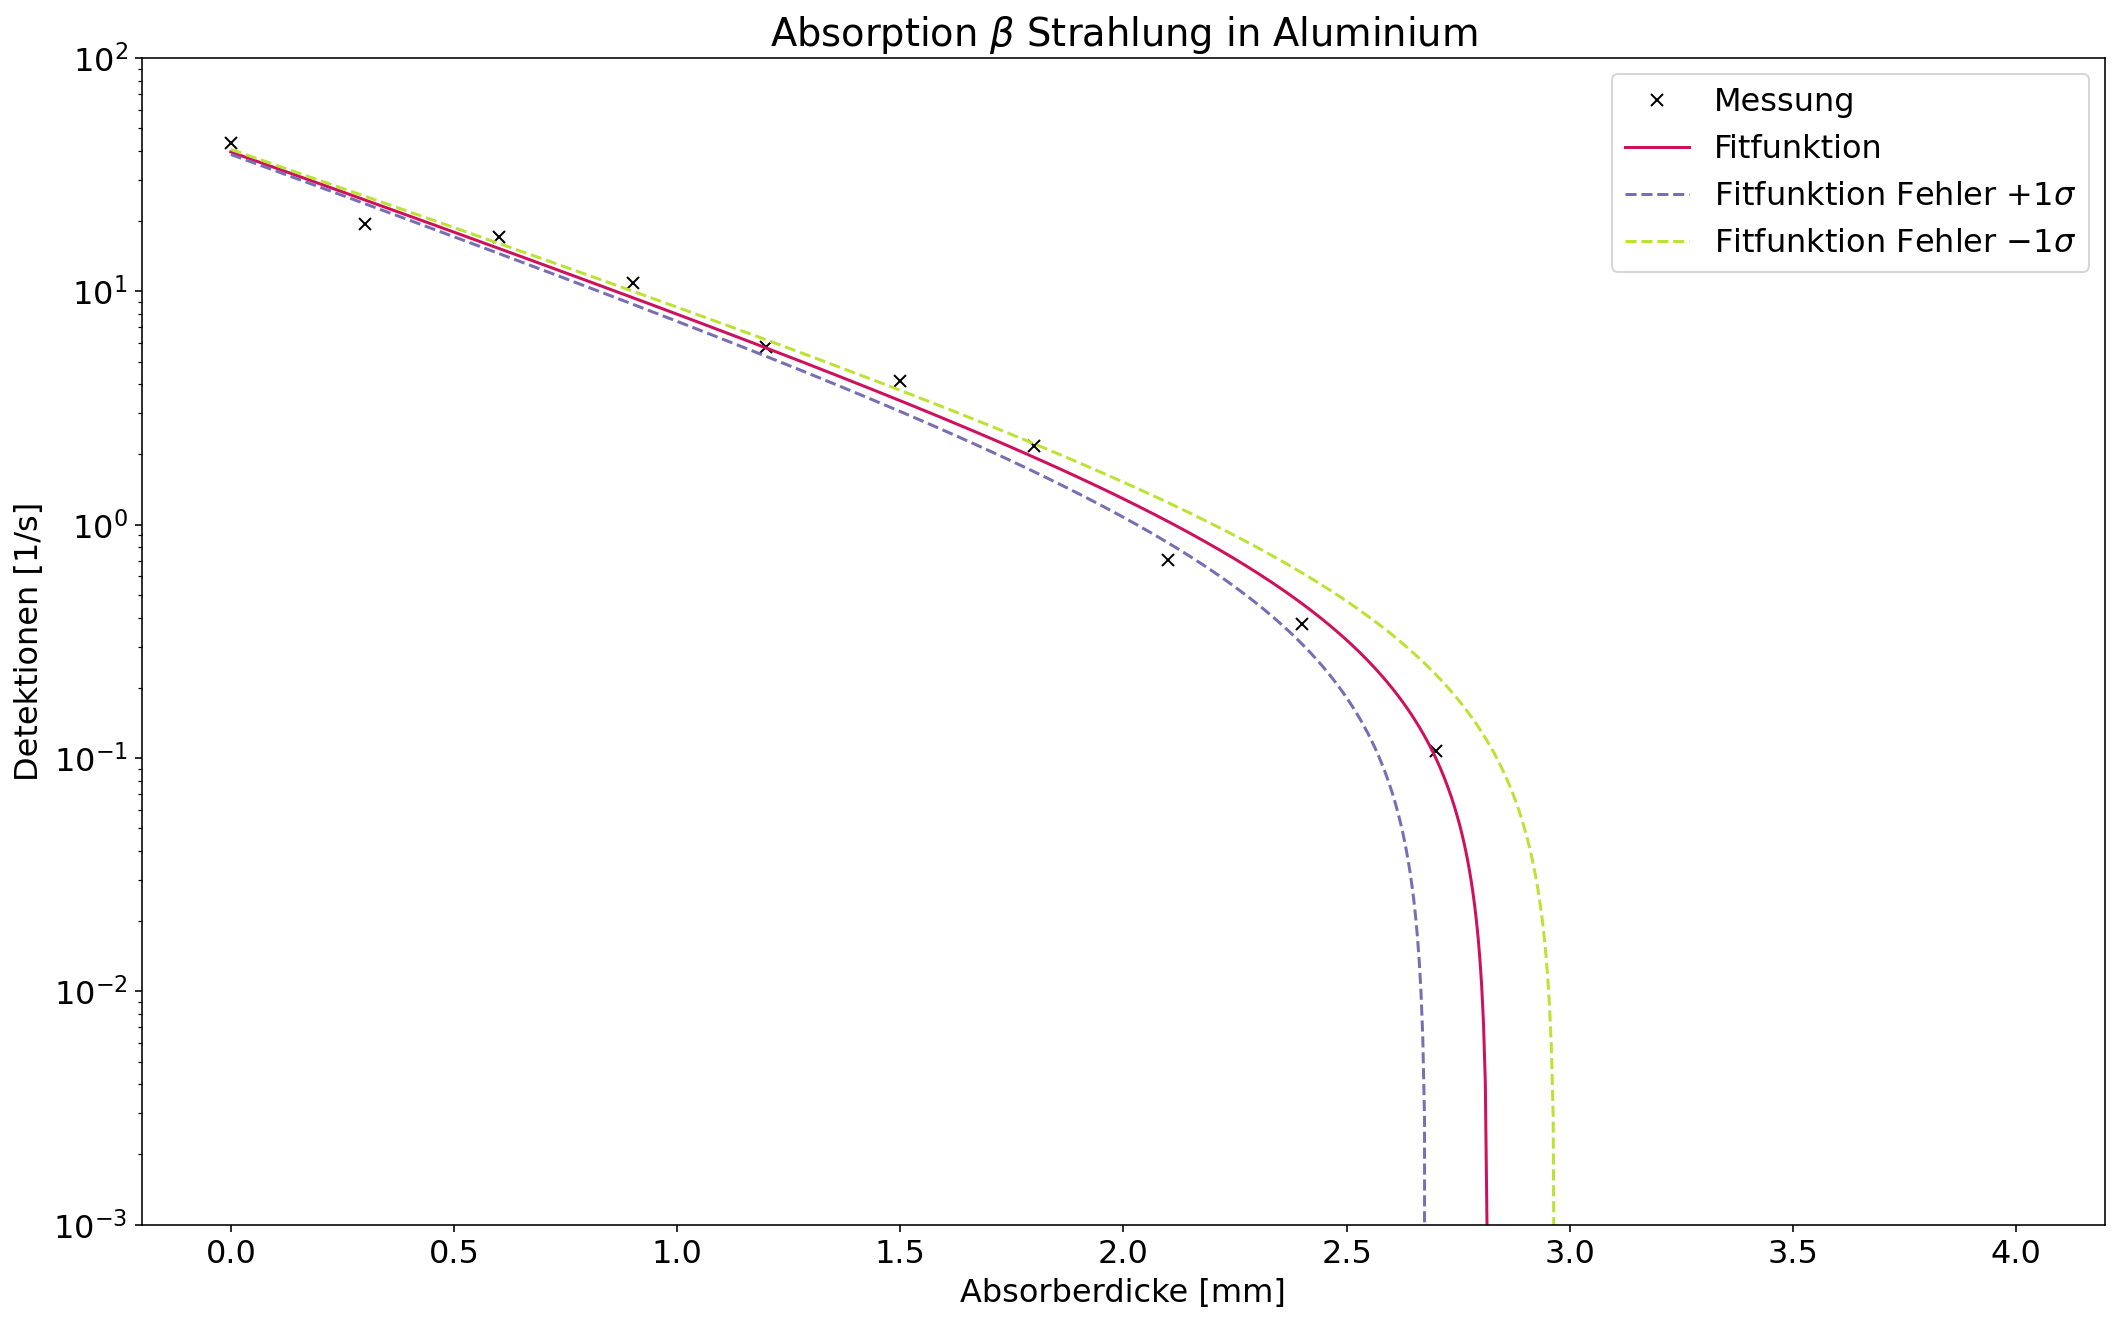

In [9]:
plt.plot(d, n, linestyle='None', marker='x', color='black', label='Messung')
d_f = np.linspace(0, 4.0, 1000)
plt.plot(d_f, fit_func(d_f, *popt), label='Fitfunktion')
popt_err = np.sqrt(pcov.diagonal())
plt.plot(d_f, fit_func(d_f, *(popt-popt_err)), linestyle='--', label=r'Fitfunktion Fehler $+1\sigma$')
plt.plot(d_f, fit_func(d_f, *(popt+popt_err)), linestyle='--', label=r'Fitfunktion Fehler $-1\sigma$')
plt.axvline

plt.yscale('log')
plt.ylim(0.001, 100)
plt.title(r'Absorption $\beta$ Strahlung in Aluminium')
plt.xlabel('Absorberdicke [mm]')
plt.ylabel('Detektionen [1/s]')
plt.legend()
plt.savefig(FIGURE_PATH+'abs_beta')
plt.show()

In [10]:
density_Al = 2.7 # g/cm^3

R_b_Al = density_Al * d_max * 0.1
R_b_Al_err = density_Al * d_max_err * 0.1

R_b_ES = 0.13

R_b = R_b_Al + R_b_ES
R_b_err = R_b_Al_err
print(f'R_b = {R_b} +/- {R_b_err}')

R_b = 0.8903221085546565 +/- 0.07859740023315814


# Absorption von $\gamma$-Strahlung

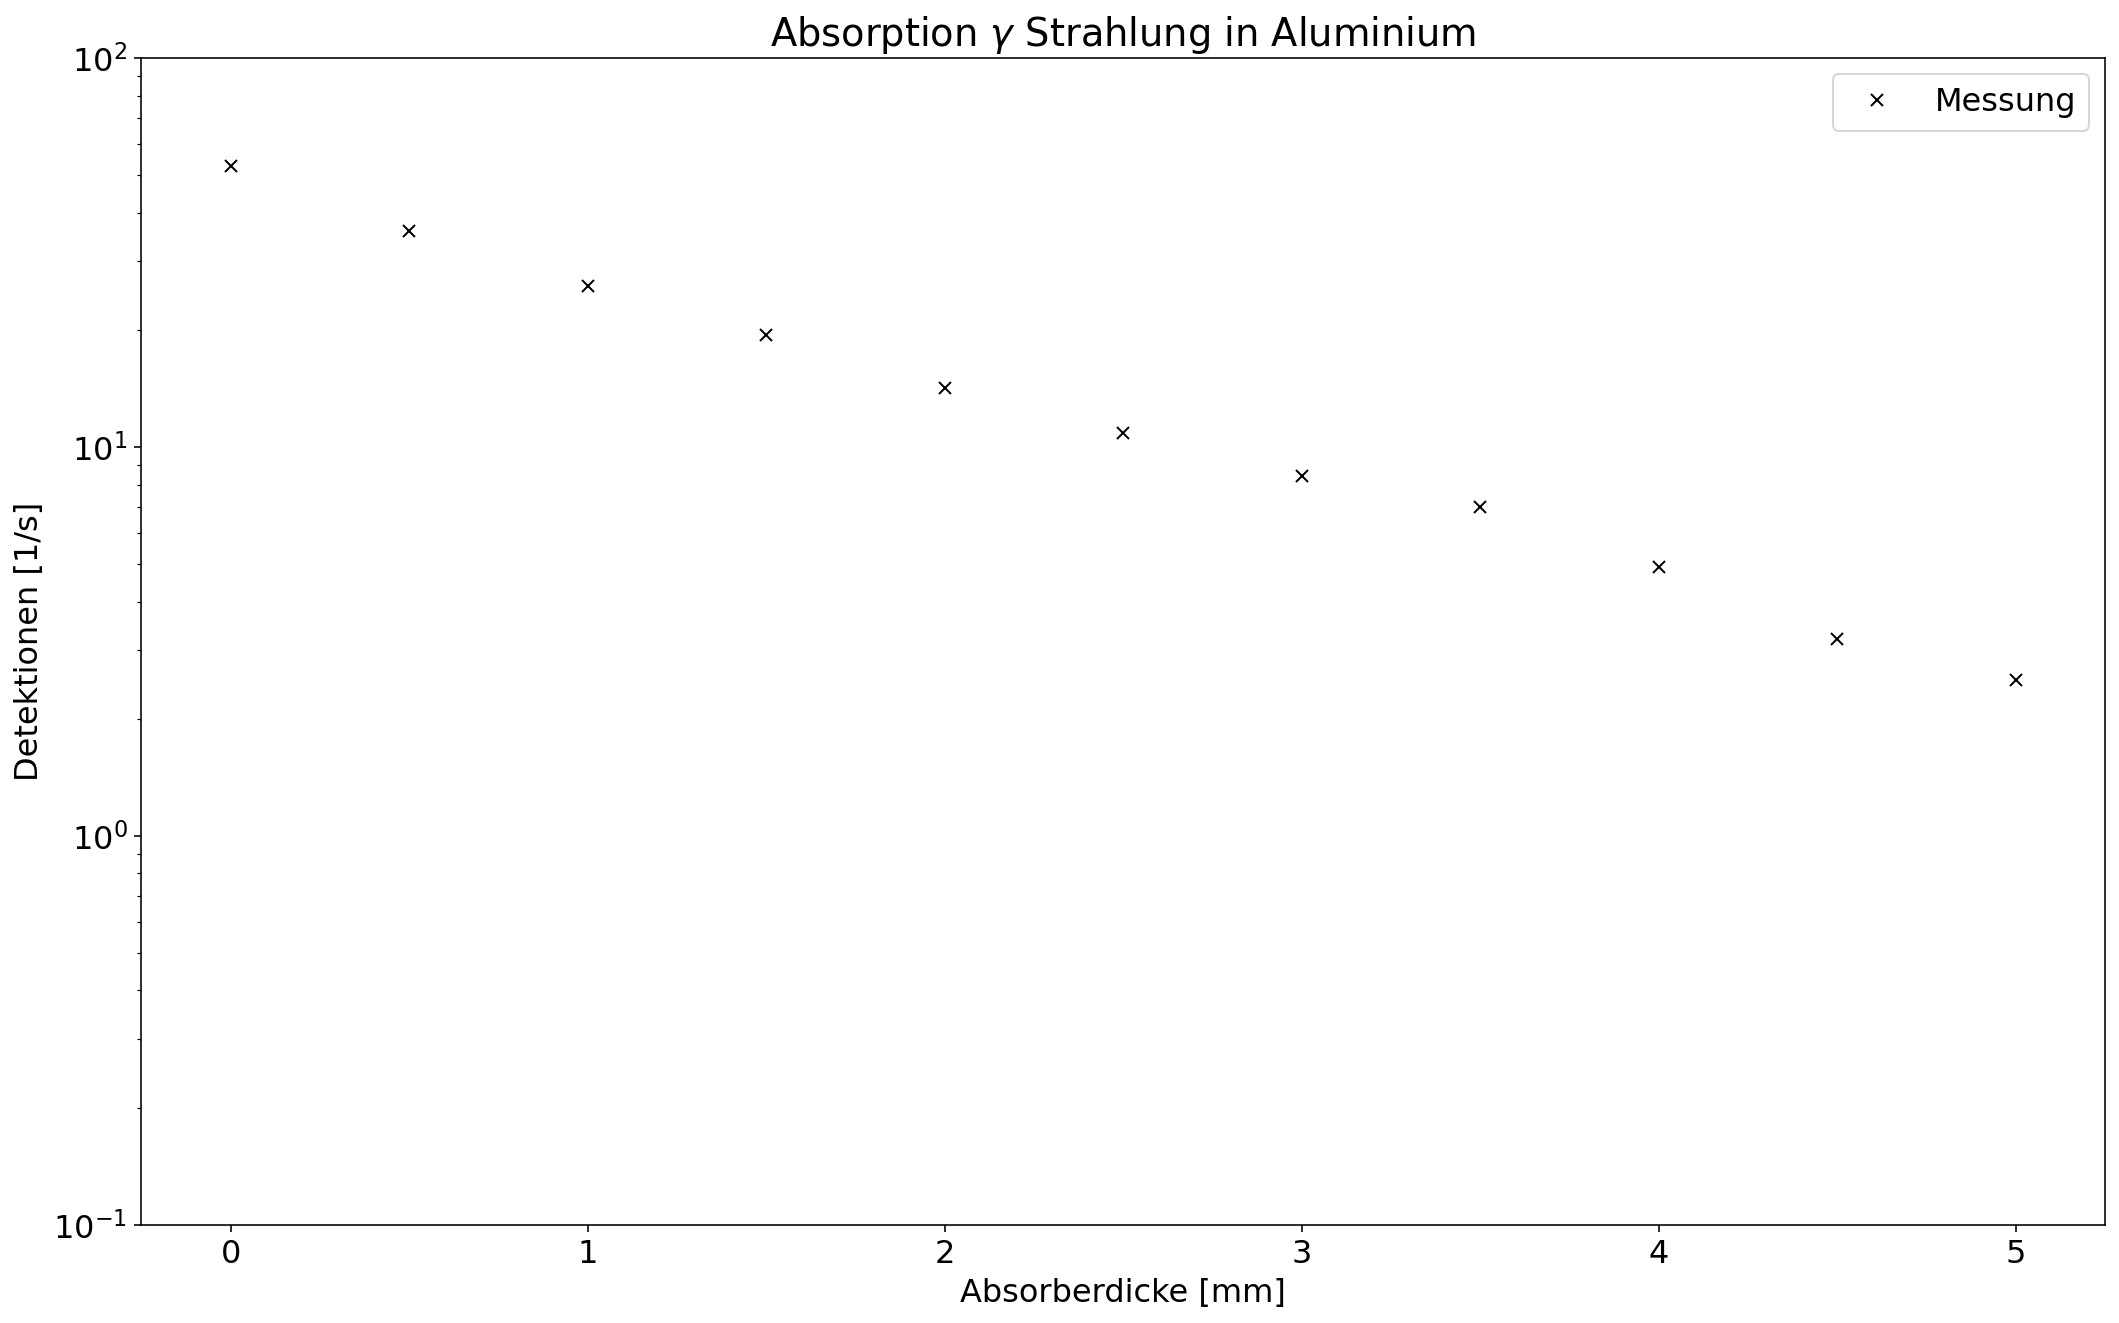

In [11]:
N = np.array([3186, 2171, 1579, 1184, 871, 673, 524, 440, 314, 212, 171]) # Detektionen 

t = 60 # Messzeit

d = np.arange(0, 5.5, 0.5) # Aluminium Dicke

N_0 = 101
t0 = 300
n_0 = N_0 / t0 # Nullmessung beta

n = N / t - n_0  # korrigierte Detektionen 

n_err = sqrt(N/t**2 + N_0/t0**2) # Fehler korrigierte Detektionen 

plt.plot(d, n, linestyle='None', marker='x', color='black', label='Messung')
plt.yscale('log')
plt.ylim(0.1, 100)
plt.title(r'Absorption $\gamma$ Strahlung in Aluminium')
plt.xlabel('Absorberdicke [mm]')
plt.ylabel('Detektionen [1/s]')
plt.legend()
plt.show()

In [12]:
def fit_func(x, a, mu):
    return a * np.exp(-mu*x)

popt, pcov = curve_fit(fit_func, d, n, sigma=n_err, absolute_sigma=True)

In [13]:
a, mu = popt
a_err, mu_err = np.sqrt(pcov.diagonal())

print(f'a = {a} +/- {a_err}')
print(f'mu = {mu} +/- {mu_err}')

a = 49.894612365177494 +/- 0.6747593048972489
mu = 0.6040083013562656 +/- 0.008028236651514557


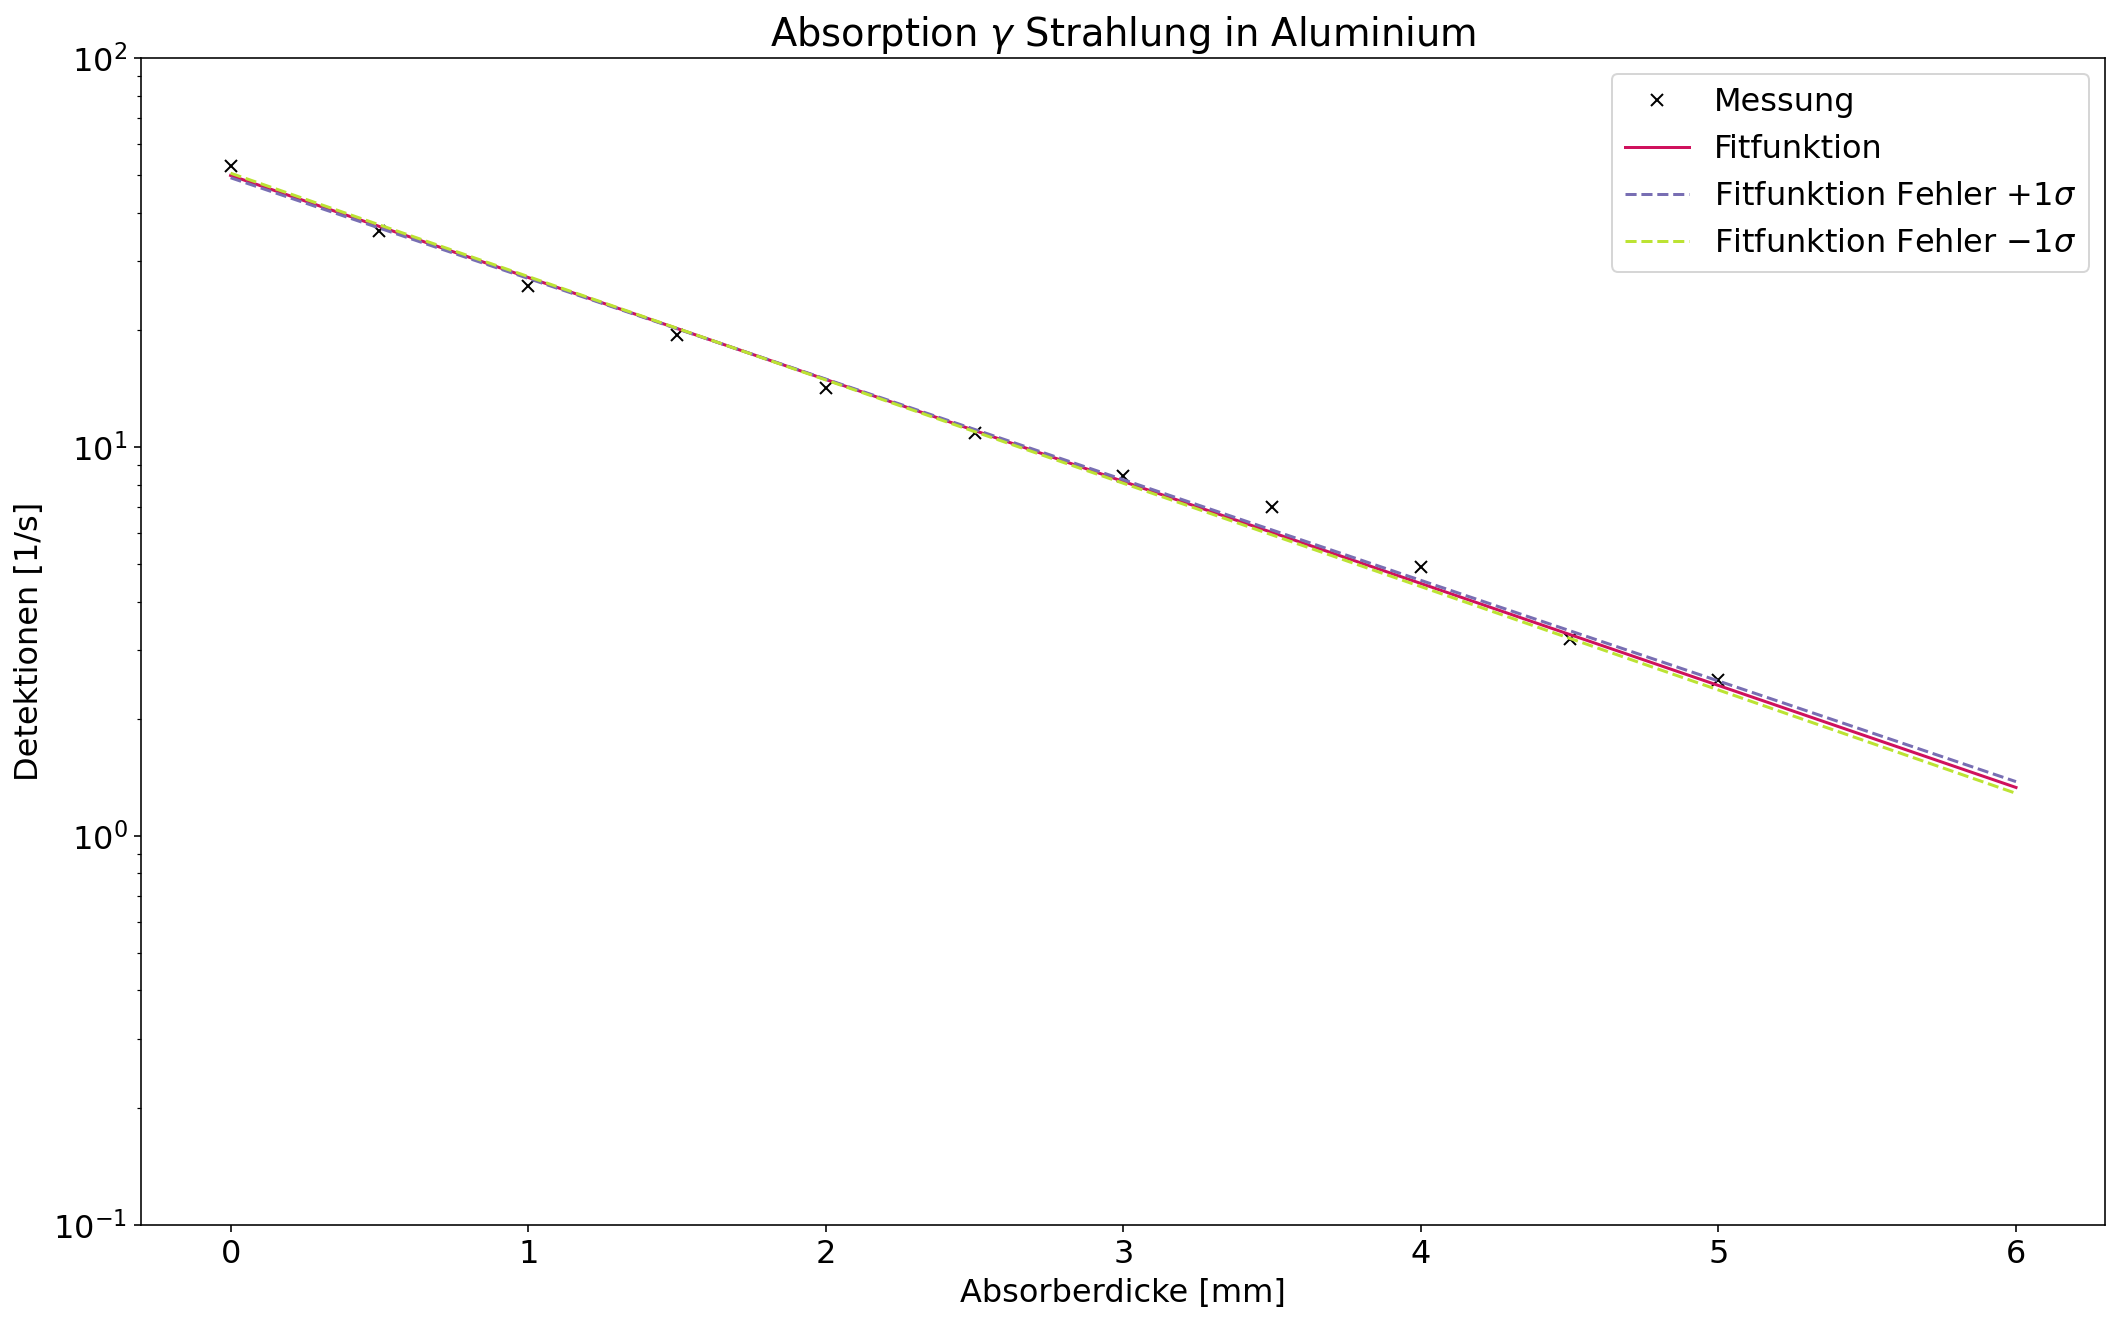

In [14]:
plt.plot(d, n, linestyle='None', marker='x', color='black', label='Messung')
d_f = np.linspace(0, 6, 1000)
plt.plot(d_f, fit_func(d_f, *popt), label='Fitfunktion')
popt_err = np.sqrt(pcov.diagonal())
plt.plot(d_f, fit_func(d_f, *(popt-popt_err)), linestyle='--', label=r'Fitfunktion Fehler $+1\sigma$')
plt.plot(d_f, fit_func(d_f, *(popt+popt_err)), linestyle='--', label=r'Fitfunktion Fehler $-1\sigma$')
plt.axvline

plt.yscale('log')
plt.ylim(0.1, 100)
plt.title(r'Absorption $\gamma$ Strahlung in Aluminium')
plt.xlabel('Absorberdicke [mm]')
plt.ylabel('Detektionen [1/s]')
plt.legend()
plt.savefig(FIGURE_PATH+'abs_gamma')
plt.show()

In [15]:
density_Pb = 11.342 # g/cm^3

mu_s = mu / density_Pb # cm^2 g^{-1}
mu_s_err = mu_err / density_Pb

print(f'mu_s = {mu_s} +/- {mu_s_err}')

mu_s = 0.05325412637597122 +/- 0.0007078325384865594


# Bestimmung der Aktivität

### Herstellerangaben

In [16]:
from datetime import date

d0 = date(2015, 2, 2) # Herstellungsdatum
d1 = date(2019, 10, 22) # Messdatum
t = (d1-d0).days / 365
print(f't = {t} years')

T = 5.27 # days; Halbwertszeit 90Co

A0 = 3700 # kBq; Nennaktivität
A = A0 * np.exp(- np.log(2) * t / T) 
print(f'A = {A} kBq')

t = 4.720547945205479 years
A = 1988.6448126655005 kBq


### Raumwinkel

In [17]:
d = np.array([5, 10, 20]) # cm; Abstand zum Zählrohr
d_err = 0.1 * np.ones(len(d))

N = np.array([31501, 9920, 2846])
t = 60 * np.ones(len(N))

N_0 = 101
t0 = 300
n_0 = N_0 / t0 # Nullmessung beta

n = N / t - n_0  # korrigierte Detektionen 

n_err = sqrt(N/t**2 + N_0/t0**2) # Fehler korrigierte Detektionen 

r = 14 / 2  * 0.1 # cm; Zählrohrradius
r_err = 0.05

eps = 0.04

A = 2 * n * d**2 / (eps * r**2)
A_err = A * np.sqrt((n_err/n)**2 + (2 * d_err/d)**2 + (2*r_err/r)**2)

for i, d_ in enumerate(d):
    print(f'd = {d_},\t A = {A[i]/1000} +/- {A_err[i]/1000} kBq')

d = 5,	 A = 1338.4693877551015 +/- 198.70727884488397 kBq
d = 10,	 A = 1683.639455782313 +/- 243.45579489044397 kBq
d = 20,	 A = 1922.3129251700675 +/- 277.67330112990874 kBq


### Raumwinkelkorrektur

In [18]:
l = 4 # cm; Zählrohrlänge
l_err = 0.1

k1 = 1 + l / d + l**2 / (4 * d**2)
k1_err = (1/d + l**2 / (2 * d**2)) * np.sqrt((l_err / l)**2 + (d_err / d)**2)

for i, d_ in enumerate(d):
    print(f'd = {d_},\t k1 = {k1[i]} +/- {k1_err[i]} kBq')

d = 5,	 k1 = 1.96 +/- 0.016648123017325406 kBq
d = 10,	 k1 = 1.44 +/- 0.0048466483264210545 kBq
d = 20,	 k1 = 1.21 +/- 0.001784656829757475 kBq


In [19]:
A_k1 = A * k1
A_k1_err = A_k1 * np.sqrt((A_err/A)**2 + (k1_err/k1)**2)

for i, d_ in enumerate(d):
    print(f'd = {d_},\t A_k1 = {A_k1[i]/1000} +/- {A_k1_err[i]/1000} kBq')

d = 5,	 A_k1 = 2623.399999999999 +/- 390.10319787610024 kBq
d = 10,	 A_k1 = 2424.4408163265307 +/- 350.67129788307034 kBq
d = 20,	 A_k1 = 2325.998639455782 +/- 336.00220882912714 kBq


### Absorptionskorrektur

In [20]:
density_abs = 7.9 # g cm^{-3}; Absorberdichte
x = 1.4 *  0.1 # cm; Absorberdicke
x_err = 0.01

mu = mu_s * density_abs # Scwächungskoeffizient Absorbermaterial
mu_err = mu_s_err * density_abs 

print(f'mu = {mu} +/- {mu_err}')

k2 = np.exp(-mu * x)
k2_err = k2 * np.sqrt((x * mu_err)**2 + (mu * x_err)**2)

print(f'k2 = {k2} +/- {k2_err}')

mu = 0.42070759837017263 +/- 0.005591877054043819
k2 = 0.9428019272250218 +/- 0.0040345272184285665


In [21]:
A_k2 = A / k2
A_k2_err = A_k2 * np.sqrt((A_err / A)**2 + (k2_err / k2)**2)

for i, d_ in enumerate(d):
    print(f'd = {d_},\t A_k2 = {A_k2[i]/1000} +/- {A_k2_err[i]/1000} kBq')

d = 5,	 A_k2 = 1419.6718834619485 +/- 210.85002697058303 kBq
d = 10,	 A_k2 = 1785.7827897507818 +/- 258.3388654371596 kBq
d = 20,	 A_k2 = 2038.9361430646104 +/- 294.6484486258449 kBq


In [22]:
A_ges = A_k1 / k2
A_ges_err = A_k1 * np.sqrt((A_k1_err / A_k1)**2 + (k2_err / k2)**2)

for i, d_ in enumerate(d):
    print(f'd = {d_},\t A_ges = {A_ges[i]/1000} +/- {A_ges_err[i]/1000} kBq')

d = 5,	 A_ges = 2782.556891585419 +/- 390.26469842772906 kBq
d = 10,	 A_ges = 2571.5272172411255 +/- 350.8247392038348 kBq
d = 20,	 A_ges = 2467.112733108179 +/- 336.1496082957116 kBq


# Absorption von $\alpha$ Strahlung

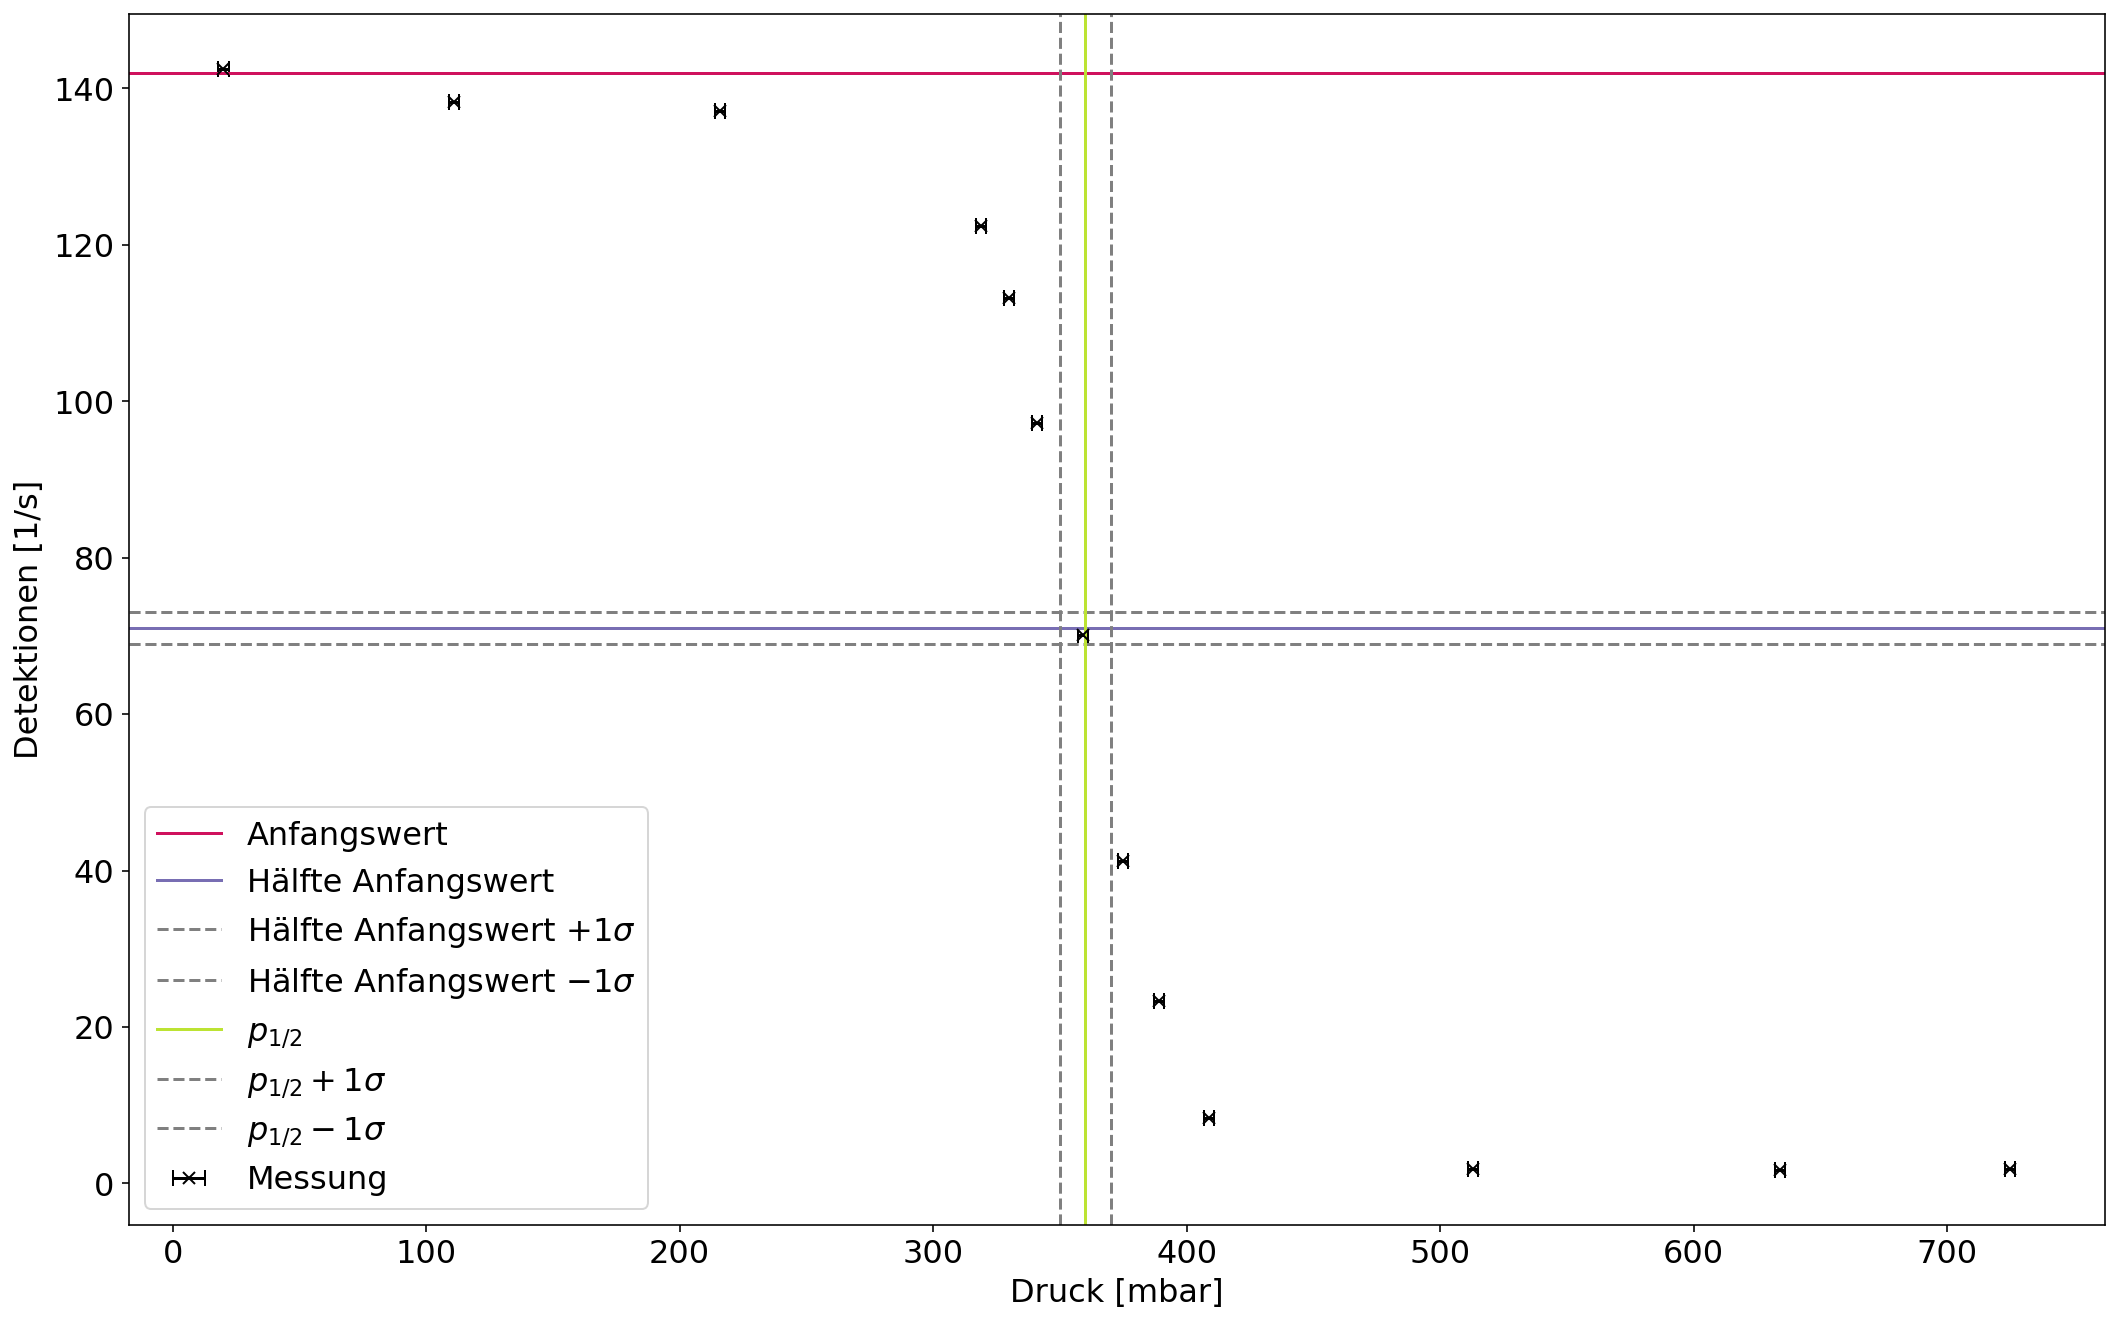

In [23]:
N = np.array([8569, 8314, 8247, 7368, 6809, 5857, 4229, 2494, 1421, 518, 127, 126, 130])
p = np.array([20, 111, 216, 319, 330, 341, 359, 375, 389, 409, 513, 634, 725])
t = 60 # in s

N_0 = 101
t0 = 300
n_0 = N_0 / t0 # Nullmessung beta

n = N / t - n_0  # korrigierte Detektionen 

n_err = sqrt(N/t**2 + N_0/t0**2) # Fehler korrigierte Detektionen 

plt.errorbar(p, n, xerr=2, linestyle='none', marker='x', color='black', label='Messung')

plt.axhline(y=142, label='Anfangswert')
plt.axhline(y=71,   color="#786eb3", label='Hälfte Anfangswert')
plt.axhline(y=71+2, color='gray', linestyle='--', label='Hälfte Anfangswert $+1\sigma$')
plt.axhline(y=71-2, color='gray', linestyle='--', label='Hälfte Anfangswert $-1\sigma$')

plt.axvline(x=360,  color="#bce333", label=r'$p_{1/2}$')
plt.axvline(x=360+10,  color="gray", linestyle='--', label=r'$p_{1/2} + 1\sigma$')
plt.axvline(x=360-10,  color="gray", linestyle='--', label=r'$p_{1/2} - 1\sigma$')

plt.xlabel('Druck [mbar]')
plt.ylabel('Detektionen [1/s]')
plt.legend()
plt.savefig(FIGURE_PATH+'abs_alpha')
plt.show()

In [24]:
p_H = 360 # mbar;
p_H_err = 10

s0 = 4.45 # cm; Abstand Präparat Zählrohr
s0_err = 0.05

p0 = 1013 # mbar;
p0_err = 1

s1 = p_H / p0 * s0
s1_err = s1 * np.sqrt((p_H_err/p_H)**2 + (s0_err/s0)**2 + (p0_err/p0)**2)

print(f's1 = {s1} +/- {s1_err} cm')


rho_Gl = 2.35
rho_Gl_err = 0.01


s2 = rho_Gl / 1.43
s2_err = s2 * np.sqrt((0.01/1.43)**2 + (rho_Gl_err/rho_Gl)**2)
print(f's2 = {s2} +/- {s2_err} cm')

s3 = 0.68 # cm; Absorptionsvermögen Goldschicht
s3_err = 0.01

s = s1 + s2 + s3
s_err = np.sqrt(s1_err**2 + s2_err**2 + s3_err**2)
print(f's = {s} +/- {s_err}')

s1 = 1.581441263573544 +/- 0.04741228751033766 cm
s2 = 1.6433566433566436 +/- 0.013452446402391786 cm
s = 3.9047979069301877 +/- 0.05028810317731366
